In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
#Importing the Dataset
df=pd.read_csv('fraud_dataset_example.csv')
print('Dataset Successfully Imported')

Dataset Successfully Imported


In [3]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# **Data Cleaning** 

In [4]:
#checking duplicate values
df.duplicated().sum()

0

In [5]:
#checking null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.shape

(101613, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df['step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [10]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
df['type'].value_counts()

PAYMENT     40062
CASH_OUT    31310
CASH_IN     20540
TRANSFER     8689
DEBIT        1012
Name: type, dtype: int64

In [12]:
type=df['type'].value_counts()

In [13]:
transaction=type.index

In [14]:
quantity=type.values

In [15]:
for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))
    

0. Step: 10
1. Type: 5
2. Amount: 101069
3. Nameorig: 101613
4. Oldbalanceorg: 59037
5. Newbalanceorig: 49018
6. Namedest: 52280
7. Oldbalancedest: 54585
8. Newbalancedest: 19741
9. Isfraud: 2
10. Isflaggedfraud: 1


# **EDA & Data Visualization**

In [16]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
print('Setup Complete')

Setup Complete


In [17]:
fraud=df['isFraud'].value_counts()
fraud = fraud.values

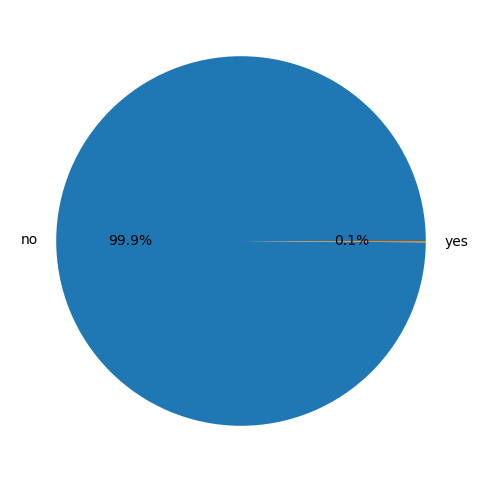

In [18]:
plt.figure(figsize=(12,6))
y = np.array(fraud)
mylabels = ["no","yes"]

plt.pie(y, labels = mylabels,autopct='%1.1f%%')
plt.show()

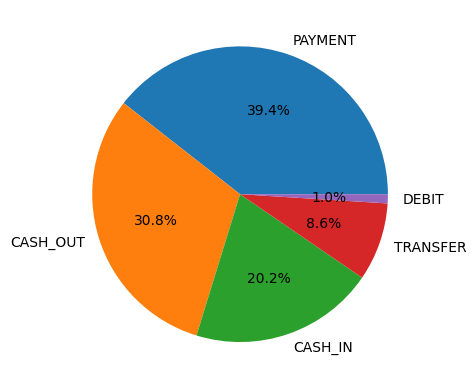

In [19]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(quantity)
mylabels = transaction

plt.pie(y, labels = mylabels,autopct='%1.1f%%')
plt.show() 

In [20]:
df['isFraud'].value_counts()

0    101497
1       116
Name: isFraud, dtype: int64

<Axes: xlabel='type', ylabel='Count'>

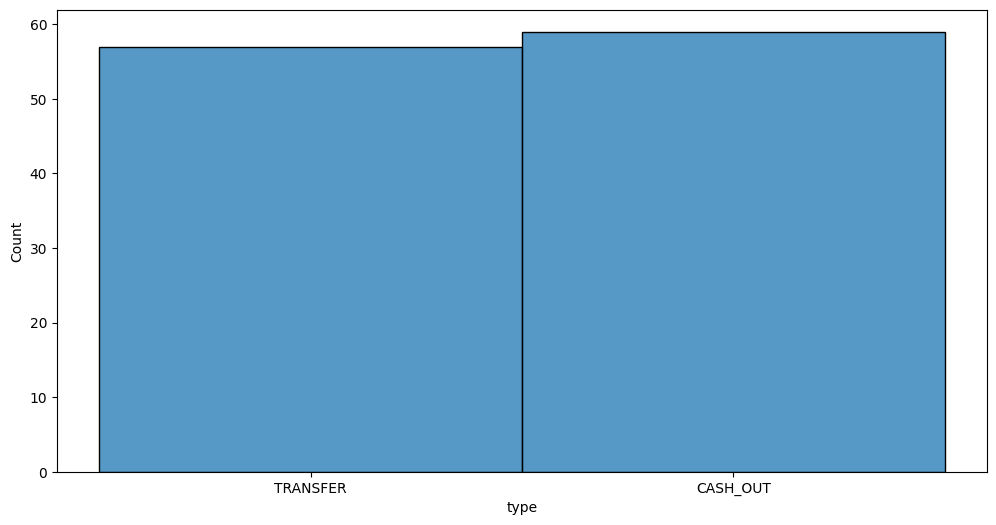

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['isFraud'] == 1]['type'])

<Axes: xlabel='type', ylabel='Count'>

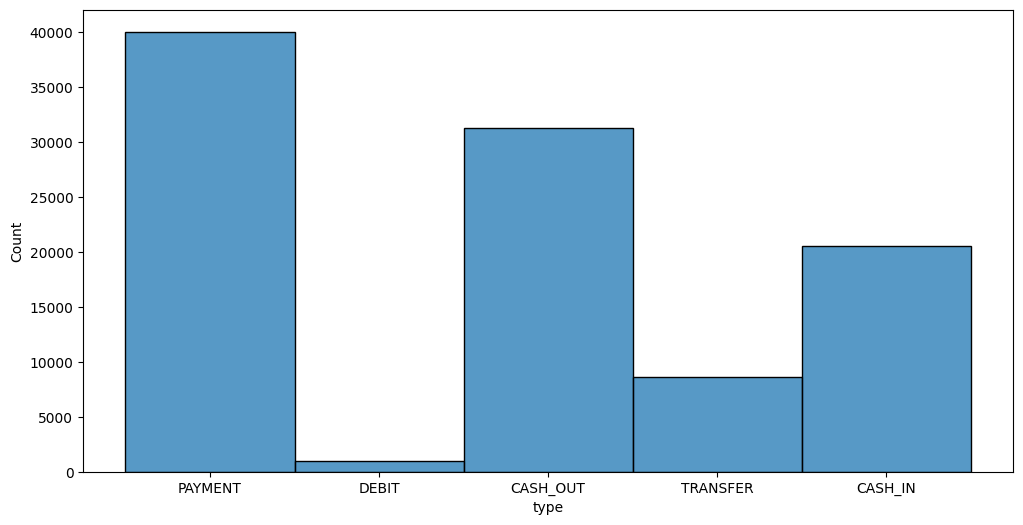

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['isFraud'] == 0]['type'])

C:\Users\Soumyadeep\AppData\Local\Temp\ipykernel_15144\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

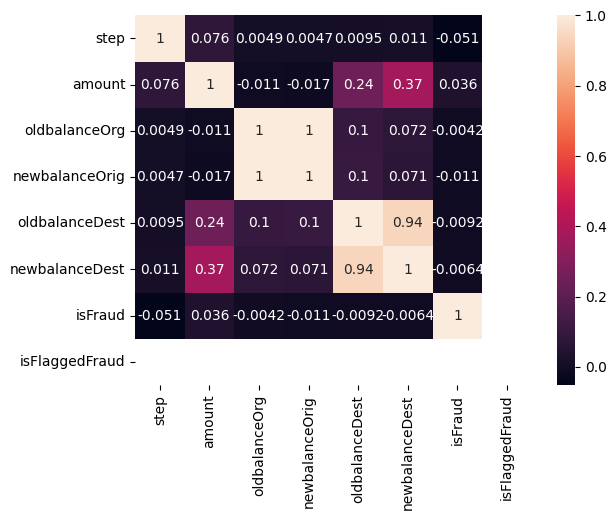

In [23]:
sns.heatmap(df.corr(),annot=True)

In [24]:
df.shape

(101613, 11)

In [25]:
df['nameOrig'].value_counts()

C1231006815    1
C358333738     1
C917141406     1
C1797964264    1
C59265825      1
              ..
C1647349751    1
C843142567     1
C1860747846    1
C754172061     1
C515691325     1
Name: nameOrig, Length: 101613, dtype: int64

In [26]:
df['nameDest'].value_counts()

C985934102     78
C1286084959    72
C248609774     71
C1590550415    70
C2083562754    66
               ..
M1555760964     1
M338533290      1
M1786033562     1
M1947241909     1
M334249577      1
Name: nameDest, Length: 52280, dtype: int64

In [27]:
#Using Get Dummies
pd.get_dummies(df.head(),df.head().columns[df.head().dtypes == 'object'])

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_PAYMENT,...,nameOrig_C1231006815,nameOrig_C1305486145,nameOrig_C1666544295,nameOrig_C2048537720,nameOrig_C840083671,nameDest_C38997010,nameDest_C553264065,nameDest_M1230701703,nameDest_M1979787155,nameDest_M2044282225
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [28]:
for i in df.columns[df.dtypes == 'object']:
    print(i,"::",df[i].unique())

type :: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
nameOrig :: ['C1231006815' 'C1666544295' 'C1305486145' ... 'C807582280' 'C1315779140'
 'C515691325']
nameDest :: ['M1979787155' 'M2044282225' 'C553264065' ... 'M1601421613' 'M524833426'
 'M334249577']


In [29]:
df1=df
# Using Categorical dtypes
for i in df.columns[df.dtypes == 'object']:
    print(i,"::")
    df1[i] = df[i].astype('category')
    df1[i] = df[i].cat.codes

type ::
nameOrig ::
nameDest ::


In [30]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,12031,170136.0,160296.36,32431,0.0,0.0,0,0
1,1,3,1864.28,34878,21249.0,19384.72,33746,0.0,0.0,0,0
2,1,4,181.00,15860,181.0,0.00,9437,0.0,0.0,1,0
3,1,1,181.00,93247,181.0,0.00,8393,21182.0,0.0,1,0
4,1,3,11668.14,54896,41554.0,29885.86,16923,0.0,0.0,0,0


In [31]:
df1.shape

(101613, 11)

In [43]:
X = df1[['type','amount','oldbalanceOrg','newbalanceOrig']]

In [44]:
y= df['isFraud']

In [45]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig
0,3,9839.64,170136.0,160296.36
1,3,1864.28,21249.0,19384.72
2,4,181.00,181.0,0.00
3,1,181.00,181.0,0.00
4,3,11668.14,41554.0,29885.86


In [46]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

# **Model Building**

In [37]:
from sklearn.model_selection import train_test_split

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [39]:

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import time

In [40]:
#importing all libraries

from sklearn.ensemble import RandomForestClassifier
from sklearnex import patch_sklearn
patch_sklearn(global_patch=True)
import sklearn


Scikit-learn was successfully globally patched by Intel(R) Extension for Scikit-learn


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [41]:
clf= RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True, random_state=0, verbose=0)

In [47]:
start_time = time.time()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print(accuracy)
print(precision)
end_time = time.time()
print(f"Execution time: {end_time - start_time:.4f} seconds")

C:\Users\Soumyadeep\anaconda3\envs\inteloneapi\lib\site-packages\daal4py\sklearn\ensemble\_forest.py:57: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warnings.warn(


0.9991143039905526
1.0
Execution time: 1.7960 seconds


# import imblearn to perform under sampling

In [48]:
!pip install imbalanced-learn

     ---------------------------------------- 0.0/226.0 kB ? eta -:--:--
     ---------- ---------------------------- 61.4/226.0 kB 1.6 MB/s eta 0:00:01
     -------------------------------------  225.3/226.0 kB 2.7 MB/s eta 0:00:01
     -------------------------------------- 226.0/226.0 kB 2.3 MB/s eta 0:00:00


# performing Under Sampling : NearMiss 

In [49]:
from collections import Counter
Counter(y_train)

Counter({0: 81197, 1: 93})

In [53]:
!pip install --upgrade pip


     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.1 MB 1.7 MB/s eta 0:00:02
     - -------------------------------------- 0.1/2.1 MB 1.3 MB/s eta 0:00:02
     --- ------------------------------------ 0.2/2.1 MB 1.3 MB/s eta 0:00:02
     ---- ----------------------------------- 0.2/2.1 MB 1.4 MB/s eta 0:00:02
     ----- ---------------------------------- 0.3/2.1 MB 1.3 MB/s eta 0:00:02
     ------- -------------------------------- 0.4/2.1 MB 1.4 MB/s eta 0:00:02
     -------- ------------------------------- 0.5/2.1 MB 1.3 MB/s eta 0:00:02
     --------- ------------------------------ 0.5/2.1 MB 1.3 MB/s eta 0:00:02
     ----------- ---------------------------- 0.6/2.1 MB 1.4 MB/s eta 0:00:02
     ------------ --------------------------- 0.6/2.1 MB 1.4 MB/s eta 0:00:02
     ------------ --------------------------- 0.7/2.1 MB 1.4 MB/s eta 0:00:02
     ------------ --------------------------- 0.7/2.1 MB 1.4 MB/s eta 0

ERROR: To modify pip, please run the following command:
C:\Users\Soumyadeep\anaconda3\envs\inteloneapi\python.exe -m pip install --upgrade pip


In [57]:
!pip install -U imbalanced-learn


In [60]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns = NearMiss(version=1, n_neighbors=3)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)

In [61]:
Counter(y_train_ns)

Counter({0: 93, 1: 93})

In [62]:
start_time = time.time()

clf.fit(X_train_ns,y_train_ns)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print(accuracy)
print(precision)
end_time = time.time()
print(f"Execution time: {end_time - start_time:.4f} seconds")

0.3959061162229986
0.0018699186991869919
Execution time: 0.1733 seconds


C:\Users\Soumyadeep\anaconda3\envs\inteloneapi\lib\site-packages\daal4py\sklearn\ensemble\_forest.py:57: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warnings.warn(


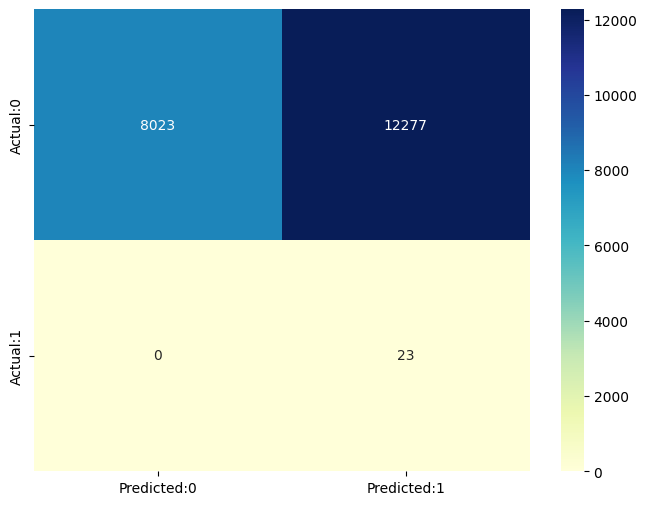

In [64]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


In [65]:
! pip install catboost


     ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
     -------------------------------------- 0.0/101.0 MB 220.2 kB/s eta 0:07:39
     -------------------------------------- 0.0/101.0 MB 220.2 kB/s eta 0:07:39
     -------------------------------------- 0.0/101.0 MB 164.3 kB/s eta 0:10:15
     -------------------------------------- 0.1/101.0 MB 309.1 kB/s eta 0:05:27
     -------------------------------------- 0.1/101.0 MB 344.8 kB/s eta 0:04:53
     -------------------------------------- 0.1/101.0 MB 344.8 kB/s eta 0:04:53
     -------------------------------------- 0.1/101.0 MB 313.8 kB/s eta 0:05:22
     -------------------------------------- 0.3/101.0 MB 609.2 kB/s eta 0:02:46
     -------------------------------------- 0.3/101.0 MB 571.2 kB/s 

In [66]:
# map categorical features
credit_catboost_ready_df = df.dropna() 

features = [feat for feat in list(credit_catboost_ready_df) if feat != 'Class']
print(features)
card_categories = np.where(credit_catboost_ready_df[features].dtypes != np.float)[0]
card_categories

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


C:\Users\Soumyadeep\AppData\Local\Temp\ipykernel_15144\802640.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  card_categories = np.where(credit_catboost_ready_df[features].dtypes != np.float)[0]


array([ 0,  1,  3,  6,  9, 10], dtype=int64)

In [70]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1, weights=[0.9],
                           flip_y=0, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform under-sampling using RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# Perform over-sampling using SMOTE
over_sampler = SMOTE(sampling_strategy='minority')
X_train_balanced, y_train_balanced = over_sampler.fit_resample(X_train_under, y_train_under)

# Train a classifier on the balanced dataset
classifier = LogisticRegression()
classifier.fit(X_train_balanced, y_train_balanced)

# Evaluate the classifier on the test set
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97       186
           1       0.54      1.00      0.70        14

    accuracy                           0.94       200
   macro avg       0.77      0.97      0.83       200
weighted avg       0.97      0.94      0.95       200



In [71]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1, weights=[0.9],
                           flip_y=0, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an EasyEnsembleClassifier
ensemble_clf = EasyEnsembleClassifier(n_estimators=10, random_state=42)

# Train the classifier on the balanced dataset
ensemble_clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = ensemble_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       186
           1       0.78      1.00      0.88        14

    accuracy                           0.98       200
   macro avg       0.89      0.99      0.93       200
weighted avg       0.98      0.98      0.98       200



In [72]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1, weights=[0.9],
                           flip_y=0, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform over-sampling using SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train_balanced, label=y_train_balanced)
dtest = xgb.DMatrix(X_test)

# Define the parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test set
y_pred = model.predict(dtest)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       186
           1       0.88      1.00      0.93        14

    accuracy                           0.99       200
   macro avg       0.94      0.99      0.96       200
weighted avg       0.99      0.99      0.99       200



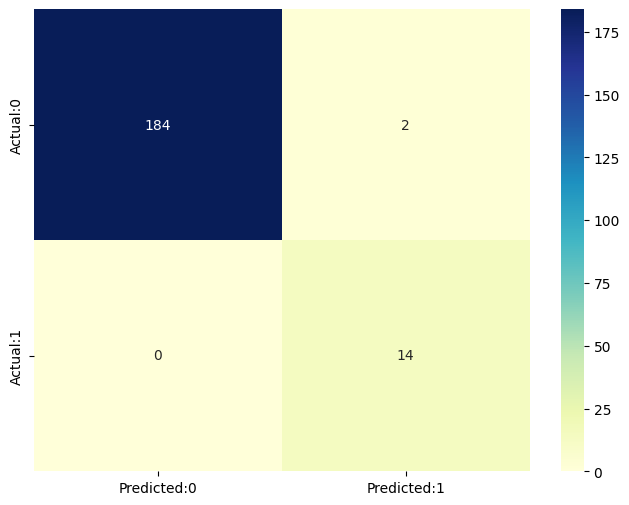

In [73]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [74]:
print(accuracy_score(y_test,y_pred))

0.99


In [77]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(random_state=42)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 715, 1: 85})
The number of classes after fit Counter({1: 715, 0: 715})


In [78]:
clf= RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True, random_state=0, verbose=0)

In [79]:
clf.fit(X_train_ns,y_train_ns)
y_pred = clf.predict(X_test)


C:\Users\Soumyadeep\anaconda3\envs\inteloneapi\lib\site-packages\daal4py\sklearn\ensemble\_forest.py:57: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warnings.warn(


In [82]:
y_pred = (y_pred > 0.5).astype(int)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0])

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       186
           1       0.88      1.00      0.93        14

    accuracy                           0.99       200
   macro avg       0.94      0.99      0.96       200
weighted avg       0.99      0.99      0.99       200



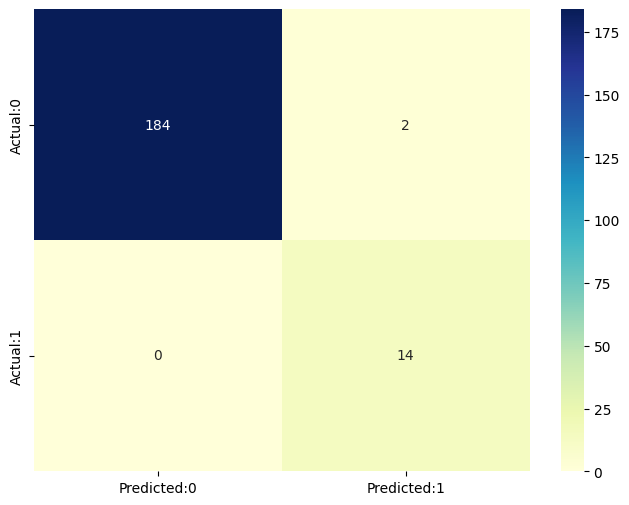

In [84]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
input 
